# ExplainableRL: Onboarding recipe
Pricing strategy can hugely influence a company's profitability, and therefore understanding price sensitivity and market demand is essential. With ExplainableRL, we have automated the manual process of pricing strategies using reinforcement learning. We have overcome the limitations of popular RL libraries such as Mushroom RL by creating an environment capable of dealing with industry datasets, and an explainability framework to understand the automated decisions.

This notebook presents a comprehensive guide on utilizing ExplainableRL. It outlines the necessary steps, including the selection of environment, training of preferred agent, performance evaluation, generation of PDP plots and SHAP values to aid in understanding the agent's decision-making, and an overview of the time and memory performance of the primary processing components of the library. A more detailed overview of ExplainableRL can be found in the documentation.


### Relevant imports

In [1]:
from library import *


# Import functions
from src.foundation.engine import Engine
from src.data_handler.data_handler import DataHandler
from src.explainability.pdp import PDP
from src.explainability.shap_values import ShapValues
from src.foundation import utils
from src.performance.performance_evaluator import PerformanceEvaluator

### 1. Parameters Setting

#### 1.1. Parameters Setting: Overview

There are six components that need to be configured to use ExplainableRL. Expand this tab to access a detail explanation of each parameter.

##### Dimensions:
    - States (states): columns from dataset to use as features, and the number of bins to divide them into.
    
    - Actions (actions): column from dataset to use as action, and the number of bins to divide it into.
    
    - Rewards (rewards): column from dataset to use as rewards, and the number of bins to divide it into.

##### Dataset:

    - Data Path (data_path): Path to dataset 

    - Columns Delimeter (col_delimiter): Delimeter used to separate the columns in dataset. 

    - Number of Samples (n_samples): Number of samples to use from dataset.

    - Normalisation Flag (normalisation): Whether to normalise the dataset.

##### Training:

    - Environment Type (env_type): which environment to use. Options = {'strategic_pricing_prediction', 'strategic_pricing_suggestion'}

    - Number of Episodes (num_episodes): Number of episodes to use for training.

    - Number of Steps (num_steps): Maximum number of steps for each episode.

    - Train/Test Splitting (train_test_split): Ratio for splitting train and test data.

    - Evaluation Flag (evaluate): Flag to specify whether to evaluate the agent or not.

    - Number of Evaluation Steps (num_eval_steps): Intervals at which to evaluate the agent (on test set) during training.

##### Agent:
    
    - Agent Type (agent_type): Which agent to use. Options: {'q_learner', 'double_q_learner', 'sarsa', 'sarsa_lambda'}

    - Gamma (gamma): Discount factor.

    - Epsilon (epsilon): Exploration parameter

    - Epsilon Decay (epsilon_decay): By how much to decay epsilon.

    - Epsilon Minimum (epsilon_minimum): The minimum value epsilon can reach.

    - Learning Rate (learning_rate): Learning rate for training. 

    - Learning Rate Decay (learning_rate_decay): Rate at which to decay the leaning rate.

    - Minumum Learning Rate Decay (learning_rate_decay_minimum): The minimum value the learning rate can reach.

    - Lambda (lambda):

    - Uncertainty Flag (use_uncertainty): Flag to specify whether to use uncertainty-informed ('True') or the epsilon-greedy policy ('False').

    - Importance of q values (q_importance): Weight given to q values when computing the optimal action using the uncertainty-informed policy.

##### Explainability:

    - Number of SHAP samples (shap_num_samples): Number of samples on which the SHAP values are computed.

##### Program Overflow:

    - Verbose Flag (verbose): Whether to print status/information statements throughout the program overflow.

### 1.2. Parameters Setting: Configuration

In [9]:

hyperparam_dict_ds_data_predict = {
    "dimensions": {'states': {'lead_time': 10,
                                'length_of_stay': 10,
                                'competitor_price_difference_bin': 4,
                                'demand_bin': 4},
                    'actions': {'price': 10},
                    'rewards': ['reward']
                    },

    "dataset": {'data_path': 'data/ds-data/my_example_data.parquet',
                'col_delimiter': '|',
                'n_samples': 100000,
                'normalisation': True},

    "training": {'env_type': 'strategic_pricing_predict',
                    'num_episodes': 50000,
                    'num_steps': 1,
                    'train_test_split': 0.2,
                    'evaluate': True,
                    'num_eval_steps': 10000},

    "agent": {'agent_type': 'double_q_learner',
                "gamma": 0.3,
                "epsilon": 0.1,
                "epsilon_decay": 0.05,
                "epsilon_minimum": 0.01,
                "learning_rate": 0.1,
                "learning_rate_decay": 0.05,
                "learning_rate_minimum": 0.01,
                "lambda": 0.2,
                "use_uncertainty": False,
                "q_importance": 0.7,
                },

    "explainability": {'shap_num_samples': 1},

    "program_flow": {"verbose": False}
}

### 2. Initialisation

In [10]:
# TODO: overview of what to initialise (DataHandler & Engine with Agent and Env inside)
# TODO: If needed by evaluation/explainability/performance add a new dictionary and explain it
hyperparam_dict = hyperparam_dict_ds_data_predict


#### 2.a. Data Loading

Load dataset and split it:

In [11]:
dataset = utils.load_data(hyperparam_dict['dataset']['data_path'], hyperparam_dict['dataset']['n_samples'])
train_dataset, test_dataset = utils.split_train_test(dataset)

#### 2.b. Datahandler Initialisation

In [12]:
# TODO: Add explanation

dh = DataHandler(hyperparam_dict=hyperparam_dict, dataset=train_dataset, test_dataset=test_dataset)


#### 2.b. Engine Initialisation

In [13]:
# TODO: Add explanation

engine = Engine(dh=dh, hyperparam_dict=hyperparam_dict)


#### 2.c. Environment and Agent Initialisation

In [14]:
engine.create_world()

### 3. Agent Training and Saving

In [8]:
# TODO: Add explanation

#### 3.a. Training

In [19]:
# TODO: Add explanation
engine.train_agent()

100%|██████████| 50000/50000 [03:32<00:00, 235.42it/s]


#### 3.b. Saving Engine

In [20]:
# TODO: Add explanation

utils.save_engine(engine, path_name='runs/engine_double_q_learner_3.pkl')

#### 3.c Load Engine from Checkpoint

In [32]:
# TODO: Add explanation

engine = utils.load_engine(path_name='runs/engine_q_learner_1.pkl')

### 4. Agent Evaluation

Import Evaluator class. The Evaluator class provides custom Reinforcement Learning Plots (such as cumulative reward per episode, or average reward distribution) averaged across different runs. It also provides other metrics such as: total agent reward versus historical reward on the test set, or action accuracy versus historical data.

In [33]:
from src.evaluation.evaluator import Evaluator

evaluator = Evaluator(engines = [engine])

Evaluate cumulative reward on test set using historical vs learnt agent policy:

In [34]:
print(f"Historical baseline: {evaluator.hist_cum_rewards()}")
print(f"Agent Policy: {evaluator.agent_cum_rewards()}")

Historical baseline: 144991.15506466993
Agent Policy: 96979.03961035633


Plot cumulative reward versus training episode:

/Users/matteomecattaf/MSc_AI/Term 2/Soft Eng Group Project/explainable-RL/src/evaluation/evaluator.py:154: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train_agent_reward_df, x='episode', y='cumulative reward', hue='agent', palette=palette)
/Users/matteomecattaf/MSc_AI/Term 2/Soft Eng Group Project/explainable-RL/src/evaluation/evaluator.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=train_hist_reward_df, x='episode', y='cumulative reward', hue='agent', palette=palette)


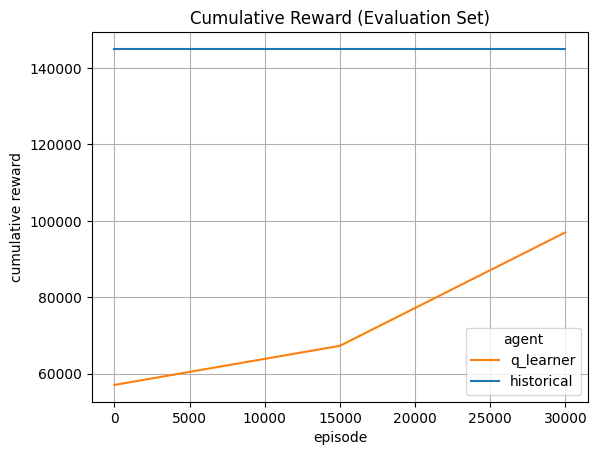

In [35]:
evaluator.plot_training_curve()

Plot average reward distribution:

saving figure


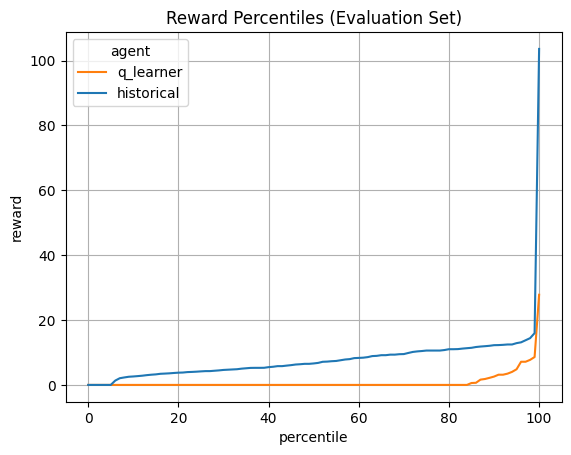

In [15]:
evaluator.plot_reward_distribution()

### 5. Explainability

In [16]:
# TODO: Add explanation on explainability framework

#### 5.a. PDP Plots

In [17]:

# TODO: Add explanation
if verbose:
    timestamp = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    print(f"{timestamp}: Show PDPs plots")
pdp = PDP(engine=engine)
pdp.build_data_for_plots(engine.agent.Q, engine.agent.Q_num_samples)
type_features = hyperparam_dict['feature_types']
fig_name = "PDP plots - All states"
pdp.plot_pdp(states_names=state_labels, 
             fig_name=fig_name,
             type_features=type_features, 
             savefig=True, 
             all_states=True)
# TODO: Change PDP parameters based on new parameters dictionary

NameError: name 'verbose' is not defined

#### 5.b. Shap Values

In [18]:
# TODO: Add explanation
if verbose:
    timestamp = datetime.now().strftime("%d/%m/%Y %H:%M:%S")
    print(f"{timestamp}: Show SHAP values plots")
shap_values = ShapValues(sample=[8, 1, 1, 1],
                         engine=engine,
                         number_of_samples=shap_num_samples)
shaps, predicted_action = shap_values.compute_shap_values()
print(shaps)
print(predicted_action)
# TODO: Change SHAP parameters based on new parameters dictionary

NameError: name 'verbose' is not defined

### 6. Performance

The time and space complexity of loading the data and training the agent can be easily obtained by instantiating a PerformanceEvaluator object and calling its methods as shown below.

The results are by default stored in the src/performance/evaluations/ folder. The user can pass in the desired path (as the kwarg results_path) to the PerformanceEvaluator constructor.

The user can also pass in the ranges of sample number, episode number, and bin number to be ranged over during performance evaluator. All these args can be omitted and will take the default values in the constructor's signature.

The benchmark settings can be edited in the constructor.


GETTING BENCHMARK PERFORMANCE
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 707.80it/s]



GETTING PERFORMANCE GRAPHS
* Plot of performance vs number of samples
-> Running training loop for 10 episodes, 10 bins, 100 samples


100%|██████████| 10/10 [00:00<00:00, 690.24it/s]


-> Running training loop for 10 episodes, 10 bins, 1000 samples


100%|██████████| 10/10 [00:00<00:00, 611.84it/s]


-> Running training loop for 10 episodes, 10 bins, 10000 samples


100%|██████████| 10/10 [00:00<00:00, 754.14it/s]


-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 774.83it/s]


-> Running training loop for 10 episodes, 10 bins, 1000000 samples


100%|██████████| 10/10 [00:00<00:00, 686.21it/s]


* Plot of performance vs number of episodes
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 770.25it/s]


-> Running training loop for 100 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 743.29it/s]


-> Running training loop for 1000 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 739.06it/s]


-> Running training loop for 100000 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 653.30it/s]


* Plot of performance vs number of bins
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 671.34it/s]


-> Running training loop for 10 episodes, 20 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 751.26it/s]


-> Running training loop for 10 episodes, 50 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 698.28it/s]


-> Running training loop for 10 episodes, 100 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 779.86it/s]



GETTING TIME BREAKDOWN PER FUNCTION
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 466.46it/s]



GETTING SPACE BREAKDOWN PER FUNCTION
-> Running training loop for 10 episodes, 10 bins, 100000 samples


100%|██████████| 10/10 [00:00<00:00, 621.81it/s]


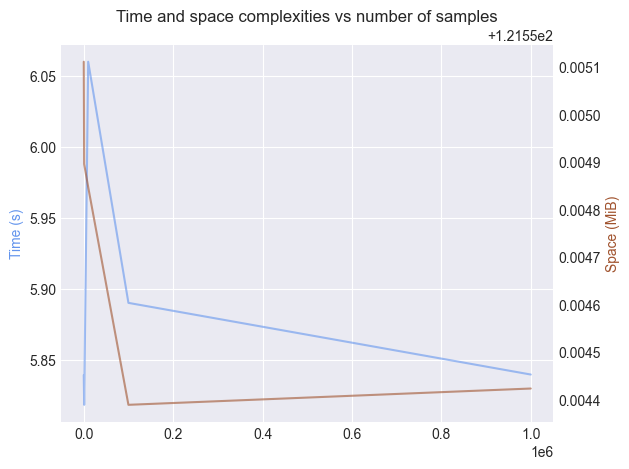

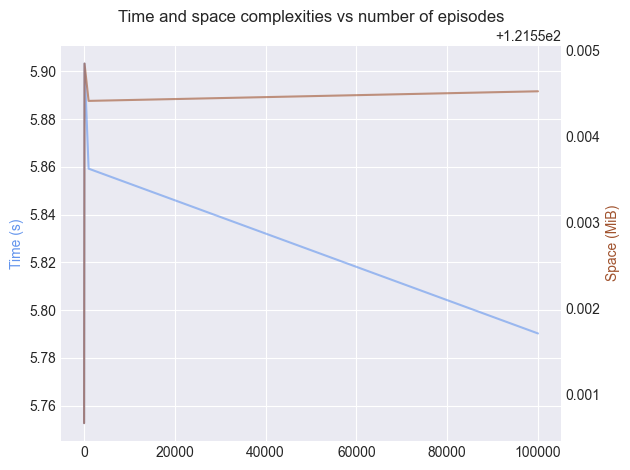

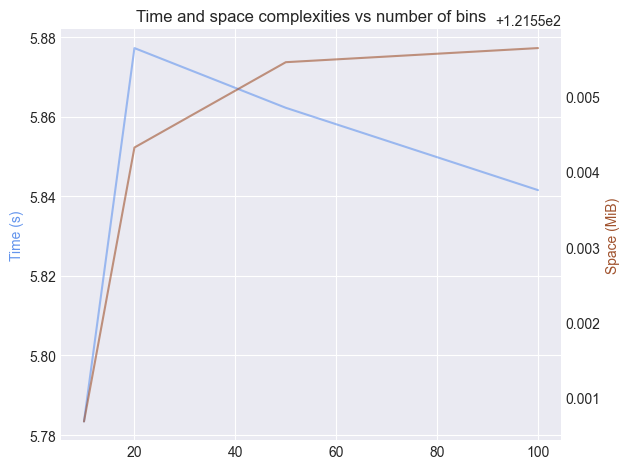

In [5]:
# User-defined parameters
results_path = "performance-evaluations"
num_sample_range=[int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)]
num_ep_range = [int(1e1), int(1e2), int(1e3), int(1e5)]
num_bin_range=[10, 20, 50, 100]

# Instantiate PerformanceEvaluator
performance_evaluator = PerformanceEvaluator(results_path="performance-evaluations",
                                             num_sample_range=num_sample_range,
                                             num_ep_range=num_ep_range,
                                             num_bin_range=num_bin_range,
                                             verbose=True)

# Get results
performance_evaluator.get_all_performance_evaluations()

### 7. Documentation

The documentation API was constructed using the "sphinx" documentation generator.

The following showcases the basic flow for automatically updating and accessing the sphinx docs.

In [ ]:
#
# Explain how to access documentation in the browser